# Gurobi Tuning 
Visualize the results from Gurobi Tuning. The dataset has four elements:
- File: The optimization model
- Runtime: The time taken to run the model without the recommended parameters (seconds)
- Runtime2: The time taken to run the model wuth the recommended parameters (seconds)
- Parameters: The recommended parameter set (one or more parameters)

We will cleanse the dataset, summarize it using groupby, visualize using Pandas. 
The visualization is rendered in two different modes:
- matplotlib (static)
- plotly (interactive)  

## Step 1 Setup

In [ ]:
# Install plotly since deepnote.com does not come with it by default.

!pip install plotly

In [ ]:
import pandas as pd

## Step 2 - Read Data

In [ ]:
df = pd.read_csv("gurobi_tuning.csv")
df.head()

,File,Runtime,Runtime2,Parameters
0,./run_1/_model_lp.lp,0.006643,0.023106,"TimeLimit 600\n,MIPFocus 2\n,TuneResults 1\n"
1,./run_1/440010_model_lp.lp,0.061802,0.050992,"TimeLimit 600\n,ZeroObjNodes 4000000\n,TuneR..."
2,./run_1/4400100100010_model_lp.lp,1.003323,0.088266,"TimeLimit 600\n,Heuristics 0\n,GomoryPasses ..."
3,./run_1/4400300200010_model_lp.lp,2.321829,0.220934,"TimeLimit 600\n,Heuristics 0\n,StartNodeLimi..."
4,./run_10/_model_lp.lp,0.006737,0.017224,"TimeLimit 600\n,PumpPasses 4000000\n,ZeroObj..."


In [ ]:
df["Parameters"].sample(10)

31                                Heuristics  0
20                             GomoryPasses  15
37                ZeroObjNodes  4000000,Cuts  3
32                                 PrePasses  1
13        MinRelNodes  4000000,GomoryPasses  15
35                    Heuristics  0,MIPFocus  1
14                    Heuristics  0,MIPFocus  1
4     PumpPasses  4000000,ZeroObjNodes  4000000
5               MIPFocus  2,PumpPasses  4000000
27                    Heuristics  0,MIPFocus  1
Name: Parameters, dtype: object

## Step 3 - Cleanse Data

In [ ]:
# The "Parameters" column include repeating and unuseful parameters:
# "Timelimit  600" at the beginning and "TuneResults  1" at the end.abs
# We will remove both of them plus removing the extra "\n"

lambda_func = lambda x: ",".join(x.replace("\n","").split(",")[1:-1])

df["Parameters"] = df["Parameters"].apply(lambda_func)

df.head(5)

,File,Runtime,Runtime2,Parameters
0,./run_1/_model_lp.lp,0.006643,0.023106,MIPFocus 2
1,./run_1/440010_model_lp.lp,0.061802,0.050992,ZeroObjNodes 4000000
2,./run_1/4400100100010_model_lp.lp,1.003323,0.088266,"Heuristics 0,GomoryPasses 15"
3,./run_1/4400300200010_model_lp.lp,2.321829,0.220934,"Heuristics 0,StartNodeLimit 500"
4,./run_10/_model_lp.lp,0.006737,0.017224,"PumpPasses 4000000,ZeroObjNodes 4000000"


In [ ]:
# Calculate the time saved (in seconds and also percentage saved)

df["TimeSaved"] = df["Runtime"] - df["Runtime2"]
df["Percent"] = df["TimeSaved"] * 100 / df["Runtime"]

df.head()

,File,Runtime,Runtime2,Parameters,TimeSaved,Percent
0,./run_1/_model_lp.lp,0.006643,0.023106,MIPFocus 2,-0.016463,-247.823278
1,./run_1/440010_model_lp.lp,0.061802,0.050992,ZeroObjNodes 4000000,0.010810,17.491523
2,./run_1/4400100100010_model_lp.lp,1.003323,0.088266,"Heuristics 0,GomoryPasses 15",0.915057,91.202645
3,./run_1/4400300200010_model_lp.lp,2.321829,0.220934,"Heuristics 0,StartNodeLimit 500",2.100895,90.484487
4,./run_10/_model_lp.lp,0.006737,0.017224,"PumpPasses 4000000,ZeroObjNodes 4000000",-0.010487,-155.660544


In [ ]:
# Find out how many unique parameter sets are recommended

df["Parameters"].nunique()

17

In [ ]:
# Display all recommended parameter sets

df["Parameters"].unique()

array(['MIPFocus  2', 'ZeroObjNodes  4000000',
       'Heuristics  0,GomoryPasses  15',
       'Heuristics  0,StartNodeLimit  500',
       'PumpPasses  4000000,ZeroObjNodes  4000000',
       'MIPFocus  2,PumpPasses  4000000', 'Heuristics  0,MIPFocus  1',
       'MinRelNodes  0', 'PumpPasses  4000000,ZeroHalfCuts  1',
       'MinRelNodes  4000000,GomoryPasses  15',
       'MinRelNodes  4000000,ZeroObjNodes  4000000', 'GomoryPasses  15',
       'Method  0,Heuristics  0', 'Heuristics  0',
       'MinRelNodes  20000000', 'PrePasses  1',
       'ZeroObjNodes  4000000,Cuts  3'], dtype=object)

## Step 4 - Aggregate and Visualize Data

### 4.1 - Aggregate and Visualize Percentage Time Saved

In [ ]:
gb_percent = df[["Parameters", "Percent"]].groupby(by="Parameters").mean()
gb_percent = gb_percent.sort_values("Percent", ascending=False)
gb_percent

,Percent
Parameters,
"Heuristics 0,StartNodeLimit 500",91.254932
Heuristics 0,90.860552
"Heuristics 0,GomoryPasses 15",90.629128
"Method 0,Heuristics 0",90.602089
"Heuristics 0,MIPFocus 1",90.522315
"MinRelNodes 4000000,GomoryPasses 15",20.884996
"MIPFocus 2,PumpPasses 4000000",19.358907
"ZeroObjNodes 4000000,Cuts 3",9.652451
MinRelNodes 20000000,-19.844402


<AxesSubplot:ylabel='Parameters'>

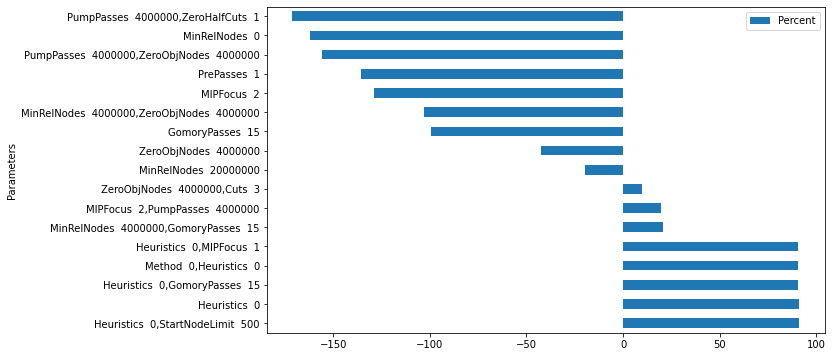

In [ ]:
gb_percent.plot.barh(figsize=(10,6))

### 4.2 - Aggregate and Visualize Frequency of Recommended Parameter Sets

In [ ]:
gb_count = df[["Parameters", "Percent"]].groupby(by="Parameters").count()
gb_count.rename(columns={"Percent":"Count"}, inplace=True)
gb_count = gb_count.sort_values("Count", ascending=False)
gb_count.head()

,Count
Parameters,
"Heuristics 0,GomoryPasses 15",6
"Heuristics 0,MIPFocus 1",6
"Heuristics 0,StartNodeLimit 500",4
MIPFocus 2,3
"MIPFocus 2,PumpPasses 4000000",3


<AxesSubplot:ylabel='Parameters'>

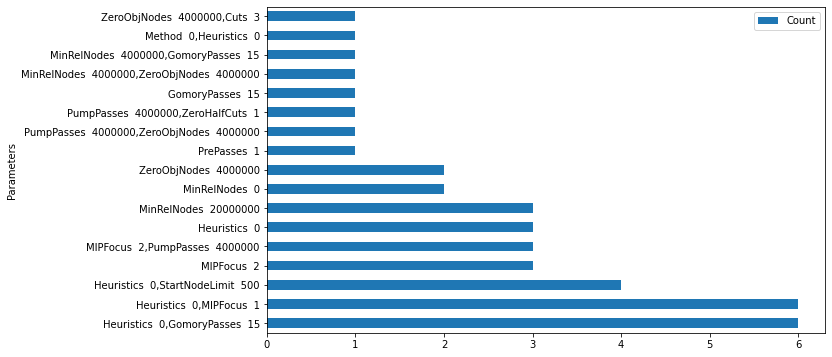

In [ ]:
gb_count.plot.barh(figsize=(10,6))

### 4.3 - Aggregate and Visualize Percentage Time Saved and Frequency of Recommended Parameter Sets Together

In [ ]:
gb = df[["Parameters", "Percent"]].groupby(by="Parameters").agg(
    Mean_Percent=pd.NamedAgg("Percent", "mean"),
    Times_Recommended=pd.NamedAgg("Percent", "count")
)

gb = gb.sort_values("Mean_Percent", ascending=False)
gb

,Mean_Percent,Times_Recommended
Parameters,,
"Heuristics 0,StartNodeLimit 500",91.254932,4
Heuristics 0,90.860552,3
"Heuristics 0,GomoryPasses 15",90.629128,6
"Method 0,Heuristics 0",90.602089,1
"Heuristics 0,MIPFocus 1",90.522315,6
"MinRelNodes 4000000,GomoryPasses 15",20.884996,1
"MIPFocus 2,PumpPasses 4000000",19.358907,3
"ZeroObjNodes 4000000,Cuts 3",9.652451,1
MinRelNodes 20000000,-19.844402,3


<AxesSubplot:ylabel='Parameters'>

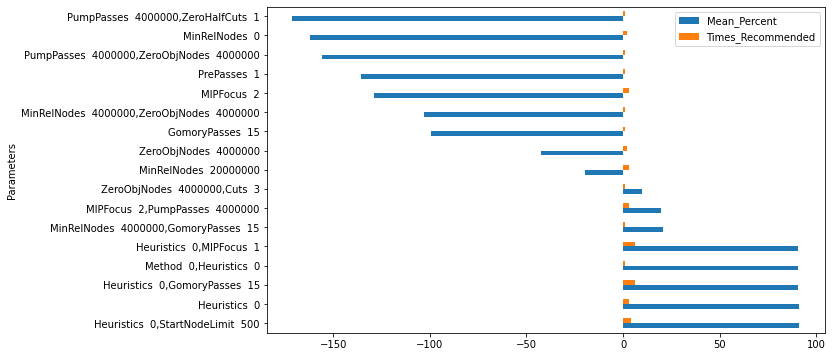

In [ ]:
# Visualize with mapplotlib as backend (default)

pd.options.plotting.backend = "matplotlib"

gb.plot.barh(figsize=(10,6))

In [ ]:
# Visualize with plot as backend

pd.options.plotting.backend = "plotly"

gb.plot.barh()

# The End.